In [1]:

import matplotlib.pyplot as plt 
import numpy as np 
import pickle
import os
from datetime import datetime, timedelta

plt.style.use("~/evanstyle.mplstyle")

import sys
sys.path.append("../Dataset/")
import Dataset

In [2]:
topdir = "/p/lustre1/angelico/hv-test-chamber/Run4/cosmics-overnight/"
chained_file = "dataset-chained.p"
d = pickle.load(open(topdir+chained_file, "rb"))[0]

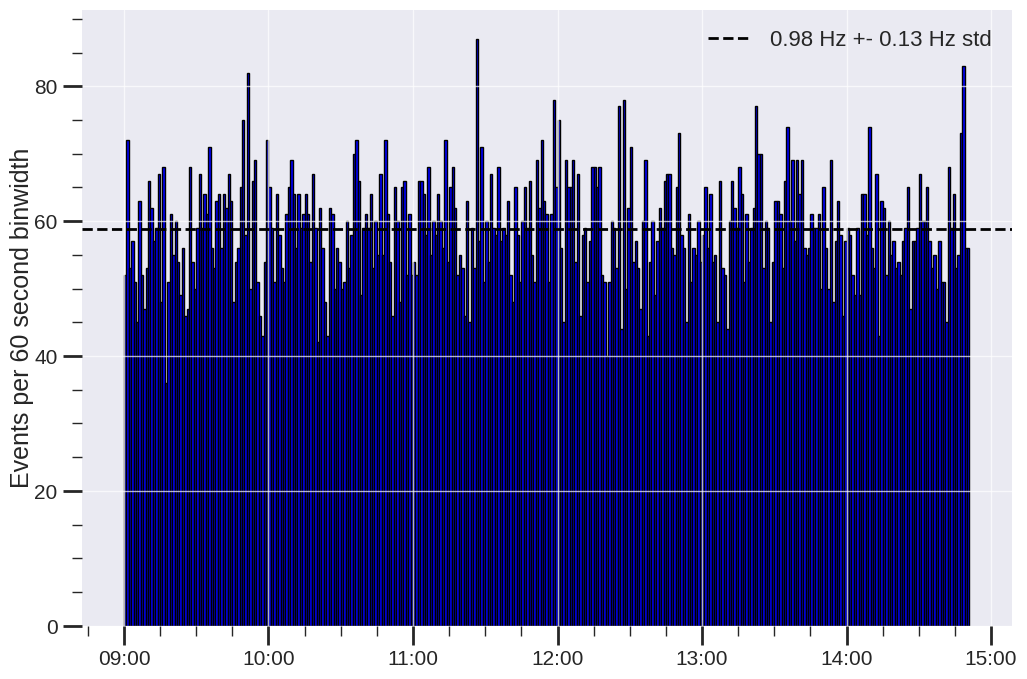

In [9]:
#plot differential rate based on timestamps
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 8))
binwidth = timedelta(minutes=1)
sep_ts = d.get_separated_timestamps()
date_start = datetime(2023, 4, 20, 9, 0, 0)
bins = np.arange(date_start, max(sep_ts['pmts']), binwidth).astype(datetime)
n, bins, patches = ax.hist(sep_ts["pmts"], bins, facecolor='blue')
ax.axhline(np.mean(n), linestyle='--', color='k', label="{:.2f} Hz +- {:.2f} Hz std".format(np.mean(n)/60, np.std(n)/60))
    
ax.set_ylabel("Events per 60 second binwidth")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.show()
#plt.savefig("cosmic_rate_1minbin_9-28-21.png", bbox_inches='tight')

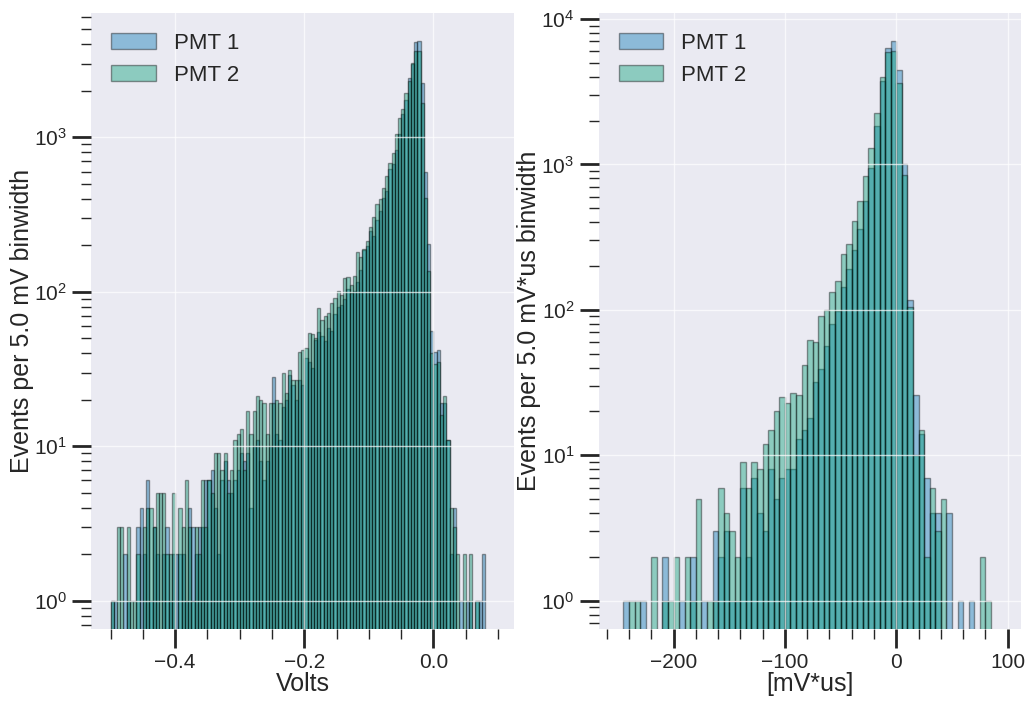

In [7]:
fig, ax = plt.subplots(ncols=2)
hs = d.reduced_df['PMT1Amplitude']
binwidth = 0.005
bins = np.arange(-0.5, 0.1, binwidth)
ax[0].hist(hs, bins, label="PMT 1", alpha=0.4)
hs = d.reduced_df['PMT2Amplitude']
binwidth = 0.005
bins = np.arange(-0.5, 0.1, binwidth)
ax[0].hist(hs, bins, label="PMT 2", alpha=0.4)
ax[0].set_xlabel("Volts")
ax[0].set_ylabel("Events per {:0.1f} mV binwidth".format(binwidth*1000))
ax[0].set_yscale('log')
ax[0].legend()


hs = np.array(d.reduced_df['PMT1Integral'])
hs = hs*1000 #mV*us
binwidth = 5
bins = np.arange(-250, 100, binwidth)
ax[1].hist(hs, bins, label="PMT 1", alpha=0.4)
hs = np.array(d.reduced_df['PMT2Integral'])
hs = hs*1000 #mV*us
binwidth = 5
bins = np.arange(-250, 100, binwidth)
ax[1].hist(hs, bins, label="PMT 2", alpha=0.4)
ax[1].set_xlabel("[mV*us]")
ax[1].set_ylabel("Events per {:0.1f} mV*us binwidth".format(binwidth))
ax[1].set_yscale('log')
ax[1].legend()

plt.show()
